In [ ]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib tensorflow


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IRIS.csv to IRIS (1).csv


In [ ]:
import pandas as pd

# If the file you uploaded is called 'iris.csv'
df = pd.read_csv('/content/IRIS (1).csv')  # replace 'iris.csv' with your file name

# Check the first few rows of the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Features and target
X = df.drop('species', axis=1)
y = df['species']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode species labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode target labels
y_one_hot = to_categorical(y_encoded)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (120, 4)
y_train shape: (120, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(8, input_dim=4, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import Callback

class WeightChangeTracker(Callback):
    def __init__(self):
        super().__init__()
        self.weight_changes = []

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.get_weights()
        self.weight_changes.append([w.copy() for w in weights])


In [ ]:
# Instantiate the weight tracker
weight_tracker = WeightChangeTracker()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10,
                    validation_data=(X_test, y_test),
                    callbacks=[weight_tracker])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5169 - loss: 1.0398 - val_accuracy: 0.6000 - val_loss: 0.9390
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4924 - loss: 0.9629 - val_accuracy: 0.6667 - val_loss: 0.8785
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5648 - loss: 0.9348 - val_accuracy: 0.8333 - val_loss: 0.8267
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8366 - loss: 0.8380 - val_accuracy: 0.9000 - val_loss: 0.7799
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7841 - loss: 0.8371 - val_accuracy: 0.9000 - val_loss: 0.7410
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7369 - loss: 0.8336 - val_accuracy: 0.9000 - val_loss: 0.7048
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8316 - loss: 0.7549 - val_accuracy: 0.9000 - val_loss: 0.6701
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8307 - loss: 0.7077 - val_accuracy: 0.9000 - 

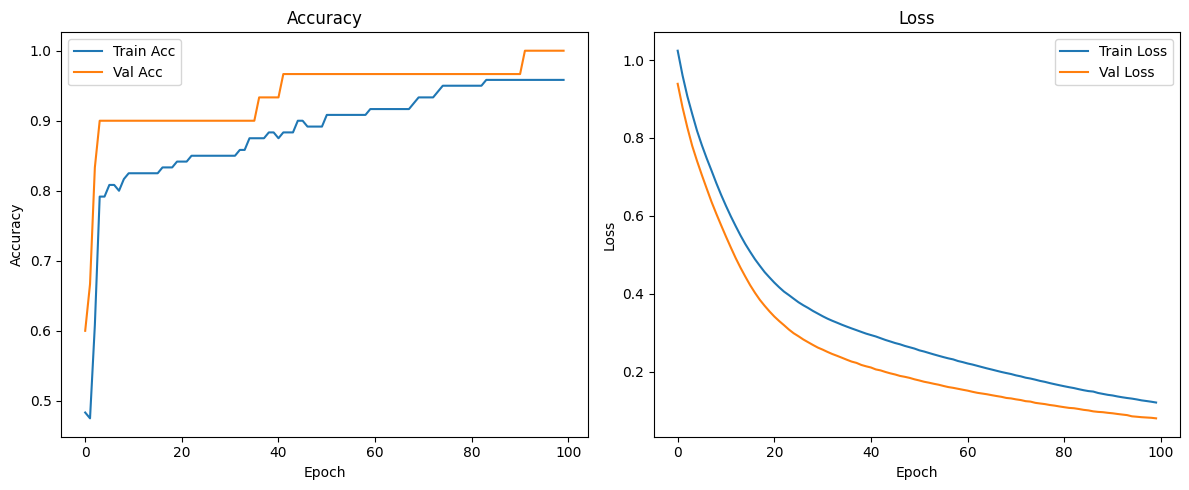

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


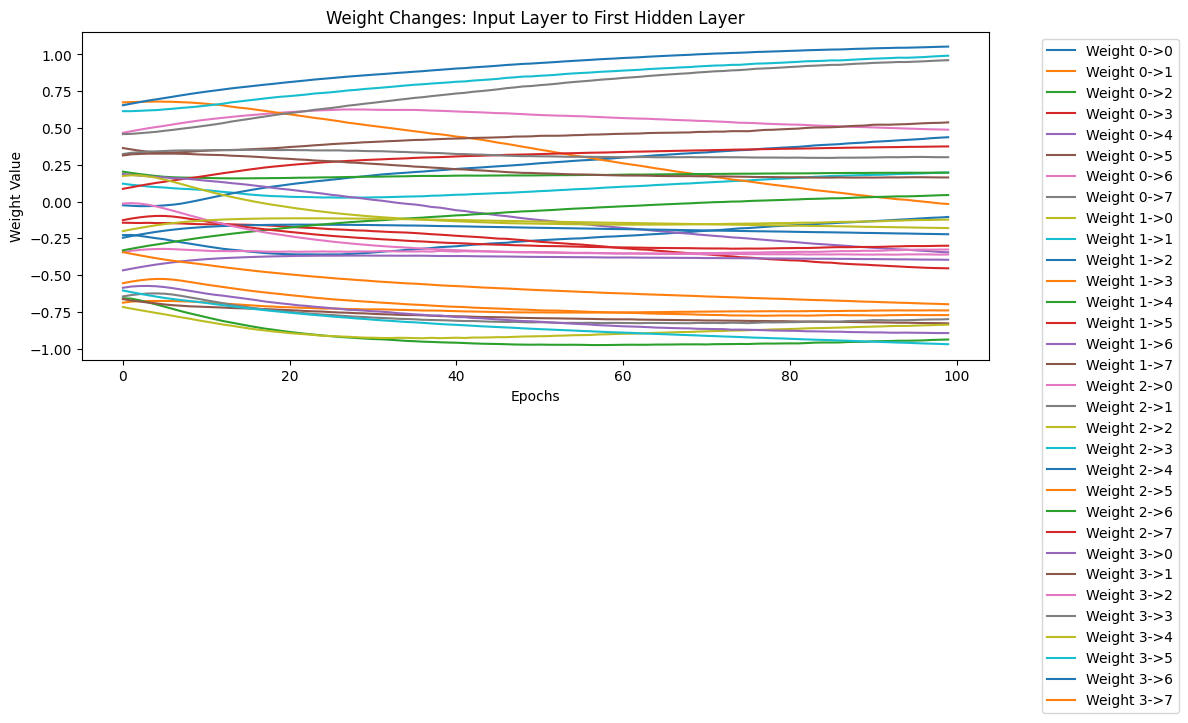

In [ ]:
import numpy as np

# Visualize weight changes of first Dense layer (input to first hidden layer)
layer_idx = 0  # First layer
weights_layer_1 = [epoch_weights[layer_idx] for epoch_weights in weight_tracker.weight_changes]
weights_layer_1 = np.array(weights_layer_1)  # shape: (epochs, 4, 8)

# Plot the change of each weight from input feature to each hidden neuron
plt.figure(figsize=(12, 6))
for i in range(weights_layer_1.shape[1]):  # input features (4)
    for j in range(weights_layer_1.shape[2]):  # neurons in layer (8)
        plt.plot(weights_layer_1[:, i, j], label=f'Weight {i}->{j}')
plt.title('Weight Changes: Input Layer to First Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 1.0000 - loss: 0.0800
Test Accuracy: 100.00%


In [ ]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



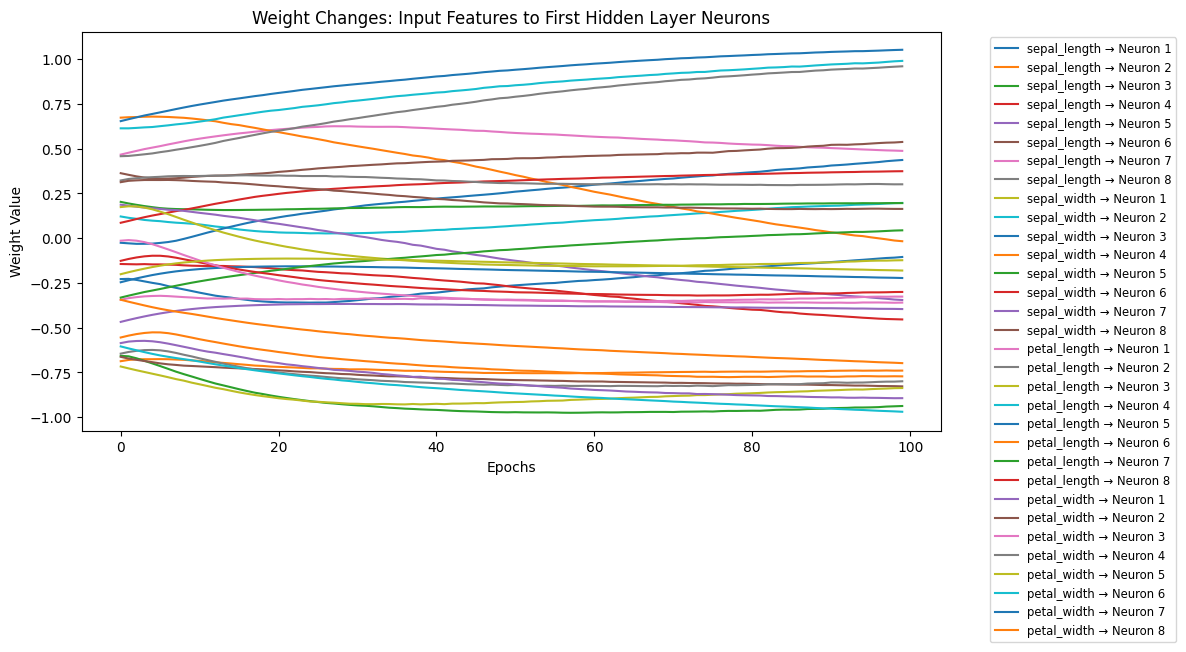

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your feature names (from your dataframe columns)
feature_names = list(df.columns[:-1])  # exclude 'species' column

# Extract weights from the weight tracker for first layer (input to hidden)
layer_idx = 0  # first layer
weights_layer_1 = [epoch_weights[layer_idx] for epoch_weights in weight_tracker.weight_changes]
weights_layer_1 = np.array(weights_layer_1)  # shape: (epochs, input_features=4, neurons=8)

plt.figure(figsize=(12, 6))

# Plot weight changes
for i, feature_name in enumerate(feature_names):
    for j in range(weights_layer_1.shape[2]):  # number of neurons in first layer
        label = f"{feature_name} → Neuron {j+1}"
        plt.plot(weights_layer_1[:, i, j], label=label)

plt.title('Weight Changes: Input Features to First Hidden Layer Neurons')
plt.xlabel('Epochs')
plt.ylabel('Weight Value')

# To avoid too crowded legend, show outside the plot with scrollable box (if many)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()
